In [1]:
import networkx as nx
import numpy as np
from scipy.sparse import diags
import scipy.linalg
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

karate = nx.karate_club_graph()

num_clusters = 2

In [16]:

def ratio_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    degree_matrix = np.diag(np.array(np.sum(adjacency_matrix, axis=1)).flatten())
    
    laplacian_matrix = degree_matrix - adjacency_matrix

    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels


In [17]:
def normalized_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    degree_vector = np.sum(adjacency_matrix, axis=1)

    degree_matrix = np.diag(degree_vector)
    degree_sqrt = scipy.linalg.sqrtm(degree_matrix)
    degree_sqrt_inv = np.linalg.inv(degree_sqrt)
    L = degree_matrix - adjacency_matrix

    normalized_laplacian_matrix = degree_sqrt_inv @ (L) @ degree_sqrt_inv

    eigenvalues, eigenvectors = np.linalg.eigh(normalized_laplacian_matrix)

    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels

In [18]:
def averaged_cut(graph, num_clusters):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()

    n = len(graph)
    I = np.eye(n)
    
    laplacian_matrix = I - adjacency_matrix

    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    
    min_eigenvalue_index = np.argmin(eigenvalues)
    min_eigenvalue_vector = eigenvectors[:, min_eigenvalue_index]

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(min_eigenvalue_vector.reshape(-1, 1))

    return cluster_labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Ratio Cut:
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


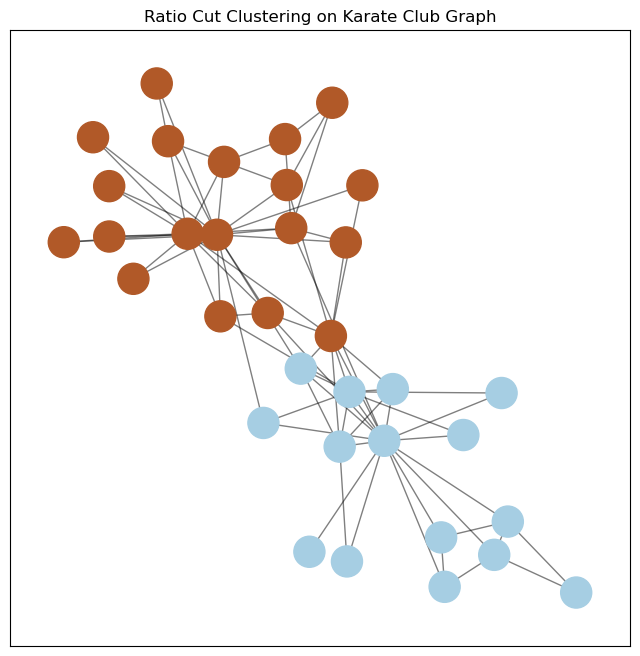

In [19]:
#ratio cut
labels_ratio_cut = ratio_cut(karate, num_clusters)

print("Labels of nodes using Ratio Cut:")
print(labels_ratio_cut)

pos = nx.spring_layout(karate)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate, pos, node_color=labels_ratio_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using normalized Cut:
[0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


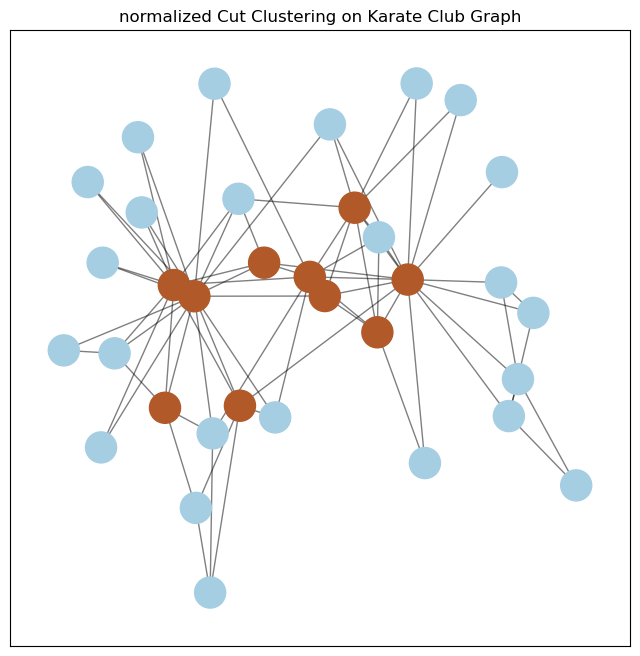

In [20]:
#normalized cut
labels_normalized_cut = normalized_cut(karate, num_clusters)

print("Labels of nodes using normalized Cut:")
print(labels_ratio_cut)

pos = nx.spring_layout(karate)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate, pos, node_color=labels_normalized_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate, pos, alpha=0.5)
plt.title("normalized Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Ratio Cut:
[1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1]


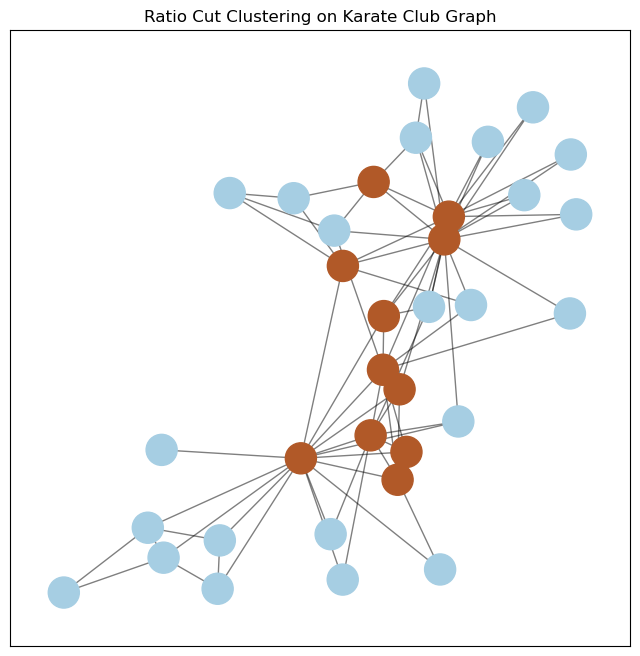

In [21]:
#averaged cut
labels_averaged_cut = averaged_cut(karate, num_clusters)

print("Labels of nodes using Ratio Cut:")
print(labels_averaged_cut)

pos = nx.spring_layout(karate)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate, pos, node_color=labels_averaged_cut, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Karate Club Graph")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Labels of nodes using Spectrul:
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


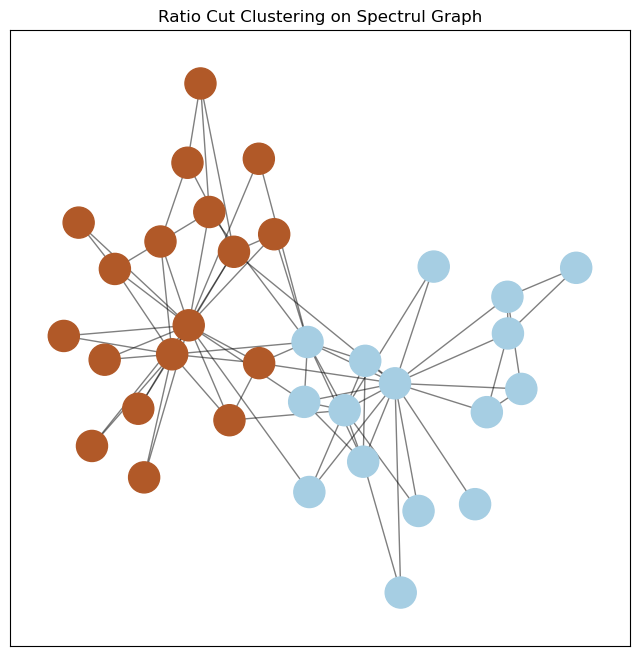

In [22]:
#Spectrul
adjacency_matrix = nx.adjacency_matrix(karate).toarray()

spectral = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', random_state=0)
labels_spectrul = spectral.fit_predict(adjacency_matrix)

print("Labels of nodes using Spectrul:")
print(labels_spectrul)

pos = nx.spring_layout(karate)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(karate, pos, node_color=labels_spectrul, cmap=plt.cm.Paired, node_size=500)
nx.draw_networkx_edges(karate, pos, alpha=0.5)
plt.title("Ratio Cut Clustering on Spectrul Graph")
plt.show()

Evaluations


In [23]:
from sklearn.metrics import davies_bouldin_score

In [24]:
adjacency_matrix = nx.adjacency_matrix(karate_graph).toarray()


# davies_bouldin_score
davies_bouldin_ratio_cut = davies_bouldin_score(adjacency_matrix, labels_ratio_cut)
davies_bouldin_normalized_cut = davies_bouldin_score(adjacency_matrix, labels_normalized_cut)
davies_bouldin_averaged_cut = davies_bouldin_score(adjacency_matrix, labels_averaged_cut)
davies_bouldin_sectrul = davies_bouldin_score(adjacency_matrix, labels_spectrul)

print("Davies-Bouldin Score for Ratio Cut:", davies_bouldin_ratio_cut)
print("Davies-Bouldin Score for Normalized Cut:", davies_bouldin_normalized_cut)
print("Davies-Bouldin Score for Averaged Cut:", davies_bouldin_averaged_cut)
print("Davies-Bouldin Score for Spectrul:", davies_bouldin_sectrul)

Davies-Bouldin Score for Ratio Cut: 2.2357053933257345
Davies-Bouldin Score for Normalized Cut: 2.52423678843989
Davies-Bouldin Score for Averaged Cut: 2.453387942167605
Davies-Bouldin Score for Spectrul: 2.050306189913687
